![alt text](Bassam-logos_black.png)

In this notebook, I present an analysis of comments from Reddit posts related to the Palestinian-Israel conflict, a topic that has sparked significant debate and sensitivity in recent times. The dataset used for this analysis contains valuable insights into the sentiments expressed by commenters regarding the ongoing situation in Gaza and Israel since 7th Oct 2023. This dataset is updated daily, providing a comprehensive and up-to-date view of the sentiments expressed on Reddit regarding this conflict.

All data utilized in this analysis was sourced from Kaggle. You can access the dataset through the following link: [Daily Public Opinion on Palestine-Israel War](https://www.kaggle.com/datasets/asaniczka/reddit-on-israel-palestine-daily-updated), the data time range is between 2nd Sep 2023 and 7th Oct 2024.

Through this analysis, I aim to explore various aspects of the comments, including:

1. **Sentiment Analysis**: Perform sentiment analysis to determine the overall sentiment of the comments towards Palestine and Israel.
2. **Biased Subreddits**: Identify the most biased subreddits and understand their stance on the conflict.
3. **Comment Score Trends**: Analyze the comment scores to uncover trends and popular opinions.
4. **Keyword Analysis**: Determine the most commonly used keywords and phrases in the comments.
5. **Common Emotions**: Identify the most common emotions found in the comments.
6. **Posting and Comments Patterns**: Analyze the most popular posting hours and months.
7. **Controversial Comments**: Examine the nature of controversial comments.

This analysis provides a comprehensive overview of the sentiments expressed in relation to this ongoing conflict on Reddit, contributing to a deeper understanding of public opinion in the digital, particularly reflecting the perspectives of foreign and Western audiences.

# Import required libraries for analysis and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from collections import Counter
import re
import text2emotion as te
import emoji

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bassa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bassa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bassa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Load Data
reddit_opinion = pd.read_csv(r"D:\Projects\My portofolio - Completed projects\Python\Daily_Public_Opinion_on_Pse-Isr_War\reddit_opinion_PSE_ISR.csv")

## Let's check data

In [3]:
#check top rows
reddit_opinion.head()

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time
0,lqrcuqk,1,Stupid morons like these OP have so far gone i...,AskMiddleEast,2024-10-07 11:08:48,1fy4rc8,Feisty-Western4308,0,1,0,...,1.0,31.0,32.0,3,NaN,🤢 The Republic of Samsung is a deeply sick pla...,0.80,3,0,2024-10-07 10:53:21
1,lqrcte4,1,&gt; I can't open that file on my phone.\n\nlm...,PublicFreakout,2024-10-07 11:08:27,1fy3e7z,EvaCarlisle,0,1,0,...,2947.0,140408.0,143795.0,223,NaN,Leaked footage shows Israeli occupation soldie...,0.74,223,0,2024-10-07 09:14:09
2,lqrct91,1,I don't believe the West will disappear like m...,worldnews,2024-10-07 11:08:25,1fx16ox,Obliviuns,0,1,0,...,2062.0,32472.0,35613.0,199,NaN,/r/WorldNews Live Thread: Israel at War (Threa...,0.80,199,0,2024-10-05 21:45:25
3,lqrcsrn,1,When you harbor a terrorist group for 15 years...,IsraelPalestine,2024-10-07 11:08:18,1fxawgn,Reddit_sucks_46,0,1,0,...,5481.0,347.0,5828.0,213,A question for Pro-Palestinians: What explanat...,Pro-Palestinians: What explanation is there fo...,0.84,213,0,2024-10-06 07:12:05
4,lqrcs7o,1,Oh lol you mean when they demanded unreasonabl...,IsraelPalestine,2024-10-07 11:08:10,1fxyjyo,Confident_Counter471,0,1,0,...,4248.0,15565.0,20373.0,19,Whether you changed your mind on the pro-Israe...,Have you changed your mind about any aspects o...,0.77,19,0,2024-10-07 03:32:09


**I want to know the data consists of how many rows, columns and info**

In [4]:
# display the number of rows and columns in the dataset
reddit_opinion.shape

(1995439, 24)

In [5]:
reddit_opinion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995439 entries, 0 to 1995438
Data columns (total 24 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   comment_id                  object 
 1   score                       int64  
 2   self_text                   object 
 3   subreddit                   object 
 4   created_time                object 
 5   post_id                     object 
 6   author_name                 object 
 7   controversiality            int64  
 8   ups                         int64  
 9   downs                       int64  
 10  user_is_verified            bool   
 11  user_account_created_time   object 
 12  user_awardee_karma          float64
 13  user_awarder_karma          float64
 14  user_link_karma             float64
 15  user_comment_karma          float64
 16  user_total_karma            float64
 17  post_score                  int64  
 18  post_self_text              object 
 19  post_title           

In [6]:
#check data nulls
reddit_opinion.isnull().sum()

comment_id                          0
score                               0
self_text                           8
subreddit                           0
created_time                        0
post_id                             0
author_name                         0
controversiality                    0
ups                                 0
downs                               0
user_is_verified                    0
user_account_created_time       88808
user_awardee_karma                283
user_awarder_karma                283
user_link_karma                   283
user_comment_karma                283
user_total_karma                  283
post_score                          0
post_self_text                1118134
post_title                          0
post_upvote_ratio                   0
post_thumbs_ups                     0
post_total_awards_received          0
post_created_time                   0
dtype: int64

In [7]:
reddit_opinion.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
score,1995439.0,23.428448,146.463734,-1336.00,1.00,3.00,11.00,16990.0
controversiality,1995439.0,0.064585,0.245793,0.00,0.00,0.00,0.00,1.0
ups,1995439.0,23.428448,146.463734,-1336.00,1.00,3.00,11.00,16990.0
downs,1995439.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.0
user_awardee_karma,1995156.0,401.347052,3002.223696,0.00,0.00,15.00,223.00,976452.0
user_awarder_karma,1995156.0,181.365357,1613.664410,0.00,0.00,0.00,18.00,655609.0
user_link_karma,1995156.0,10638.939285,100365.788143,0.00,22.00,427.00,3238.00,12313038.0
user_comment_karma,1995156.0,44870.291705,117970.672389,-100.00,1825.00,10465.00,40364.00,8994082.0
user_total_karma,1995156.0,56091.943399,173958.560965,-99.00,2414.00,12997.00,48776.00,13925557.0
post_score,1995439.0,1640.132800,3149.905923,0.00,48.00,348.00,1906.00,37793.0


**Determine the Time Range**

In [8]:
# Convert columns to datetime type
reddit_opinion['created_time'] = pd.to_datetime(reddit_opinion['created_time'])

# Find the minimum and maximum dates
first_comment_time = reddit_opinion['created_time'].min()
last_comment_time = reddit_opinion['created_time'].max()

print(first_comment_time) 
print(last_comment_time)


2023-09-02 12:02:19
2024-10-07 11:08:48


**Exclude Unverified Users**

To ensure that the analysis is based on posts and comments from verified users, I will create a new DataFrame that excludes unverified users. 

In [9]:
# Create a new DataFrame excluding unverified users
verified_users_data = reddit_opinion[reddit_opinion['user_is_verified'] == True]

# Display the shape of the new DataFrame
verified_users_data.shape

(1905733, 24)

# Let's Analyse Data

# 1. Perform sentiment analysis to determine the overall sentiment of the comments towards Palestine and Israel

**I will download the VADER lexicon, specifically designed for sentiment analysis in social media texts. Next, I will extract the compound score from the sentiment analysis and store it in a new column. Then, I will define a function that takes the compound score as input and assigns a sentiment label (positive, negative, or neutral) based on its value:**

**Positive:** If the compound score is greater than or equal to 0.05.  
**Negative:** If the compound score is less than or equal to -0.05.  
**Neutral:** If the compound score falls between -0.05 and 0.05.

In [10]:
# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment scores
def get_sentiment_scores(comment):
    # Check if the comment is a string
    if isinstance(comment, str):
        return sia.polarity_scores(comment)
    else:
        return {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}  # Return default values if not a string

# Apply the function to the 'self_text' column
verified_users_data.loc[:, 'sentiment_scores'] = verified_users_data['self_text'].apply(get_sentiment_scores)

# Extract the compound score for overall sentiment
verified_users_data.loc[:, 'compound_score'] = verified_users_data['sentiment_scores'].apply(lambda x: x['compound'])

# Define a function to determine overall sentiment label
def sentiment_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create a new sentiment column
verified_users_data.loc[:, 'sentiment'] = verified_users_data['compound_score'].apply(sentiment_label)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Bassa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\Bassa\AppData\Local\Temp\ipykernel_16096\1137193425.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verified_users_data.loc[:, 'sentiment_scores'] = verified_users_data['self_text'].apply(get_sentiment_scores)
C:\Users\Bassa\AppData\Local\Temp\ipykernel_16096\1137193425.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verifi

In [11]:
# Display the first 20 rows of the updated DataFrame with sentiment analysis results
verified_users_data[['self_text', 'compound_score', 'sentiment']].head(20)

,self_text,compound_score,sentiment
0,Stupid morons like these OP have so far gone i...,-0.8885,negative
1,&gt; I can't open that file on my phone.\n\nlm...,0.7003,positive
2,I don't believe the West will disappear like m...,-0.7469,negative
3,When you harbor a terrorist group for 15 years...,-0.7741,negative
4,Oh lol you mean when they demanded unreasonabl...,0.2263,positive
5,"Ah, I didn't even see the entire title. So par...",-0.2960,negative
6,That is hilarious. Is that what you learn in s...,0.7476,positive
7,&gt;Look at how she reacted after Oct 7th. \n\...,-0.7783,negative
8,Well said.,0.2732,positive
9,"For Lebanon its more Hezbollah, but since Hezb...",0.4497,positive


**Sentiment Analysis Results**

In [12]:
# Count the occurrences of each sentiment label
sentiment_counts = verified_users_data['sentiment'].value_counts()

# Display the sentiment analysis results
print("Sentiment Analysis Results:")
print(f"Positive Comments: {sentiment_counts.get('positive')}")
print(f"Negative Comments: {sentiment_counts.get('negative')}")
print(f"Neutral Comments: {sentiment_counts.get('neutral')}")

Sentiment Analysis Results:
Positive Comments: 626447
Negative Comments: 876152
Neutral Comments: 403134


**Plotting the sentiment distribution**

C:\Users\Bassa\AppData\Local\Temp\ipykernel_16096\4258872733.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


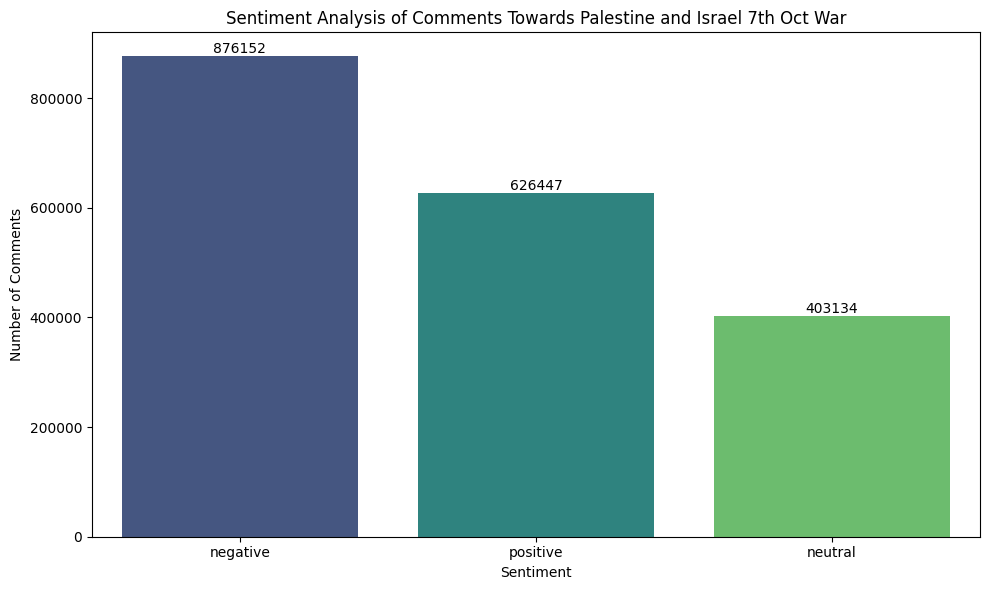

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# Adding data labels on top of each bar
for i, v in enumerate(sentiment_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')  # Add the value above the bar

plt.title('Sentiment Analysis of Comments Towards Palestine and Israel 7th Oct War')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.tight_layout()
plt.show()

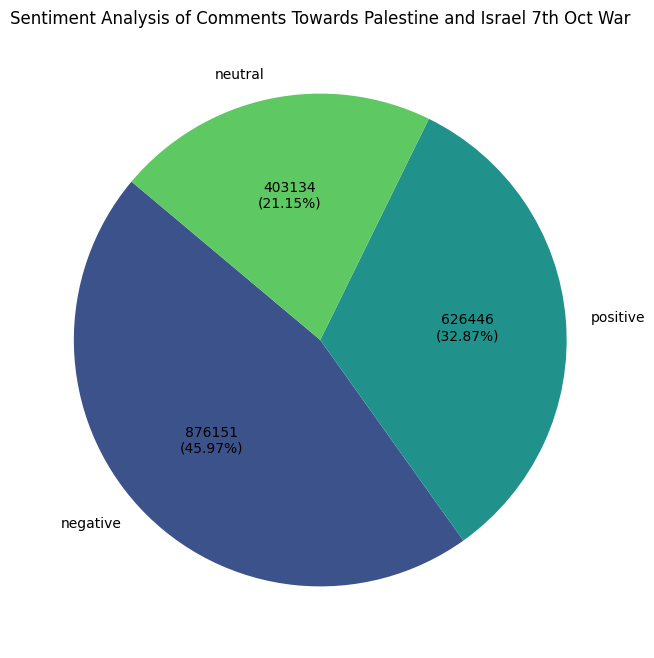

In [14]:
values = sentiment_counts.values  # Number of comments for each sentiment
labels = sentiment_counts.index  # Sentiment labels (positive, negative, neutral)

# Define colors for the pie chart
colors = sns.color_palette('viridis', len(values))  # Using the 'viridis' palette from seaborn

# Create a pie chart with numbers and percentage labels
def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f"{absolute}\n({pct:.2f}%)"

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, colors=colors, autopct=lambda pct: func(pct, values), startangle=140)
plt.title('Sentiment Analysis of Comments Towards Palestine and Israel 7th Oct War')
plt.show()



# 2. Identify the most biased subreddits and understand their stance on the conflict

**Aggregate Sentiment Data by Subreddit:**  
- Group comments by their respective subreddits and compute the average sentiment score (compound score) for each subreddit.  
- Calculate the counts of positive, negative, and neutral comments for each subreddit to assess which sentiments dominate.

In [15]:
# Calculate the average compound sentiment score for each subreddit
subreddit_sentiment = verified_users_data.groupby('subreddit')['compound_score'].mean()

# Reset index to turn the grouped data into a DataFrame
subreddit_sentiment = subreddit_sentiment.reset_index()

# Classify sentiment based on the average score
subreddit_sentiment['sentiment'] = subreddit_sentiment['compound_score'].apply(
    lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

subreddit_sentiment


,subreddit,compound_score,sentiment
0,AbruptChaos,0.008344,neutral
1,ActualPublicFreakouts,-0.063542,negative
2,AskMiddleEast,-0.070480,negative
3,CombatFootage,-0.087883,negative
4,CrazyFuckingVideos,-0.014670,neutral
5,IsraelPalestine,-0.154976,negative
6,IsrealPalestineWar_23,-0.191855,negative
7,NoahGetTheBoat,-0.143145,negative
8,NonCredibleDefense,-0.013375,neutral
9,Palestine,-0.075328,negative


C:\Users\Bassa\AppData\Local\Temp\ipykernel_16096\2375821620.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


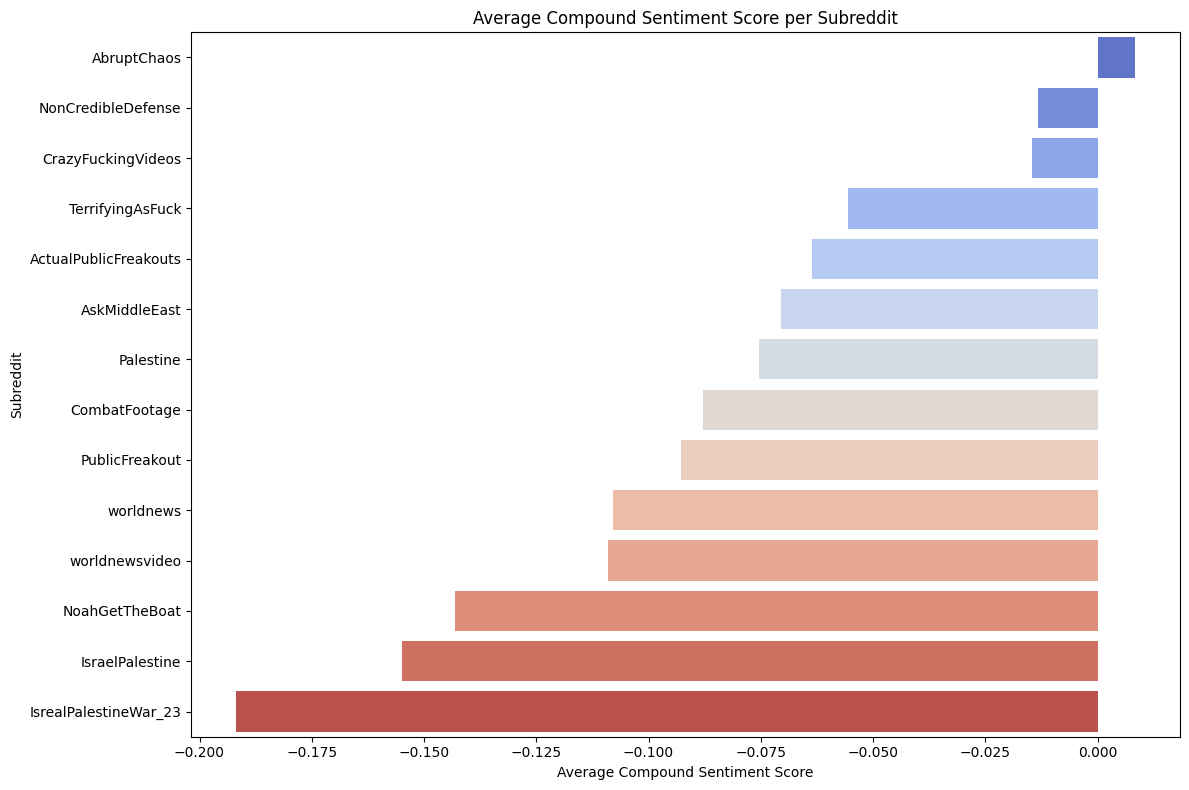

In [16]:
# Sort the data for better visualization
subreddit_sentiment = subreddit_sentiment.sort_values(by='compound_score', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(
    x='compound_score', 
    y='subreddit', 
    data=subreddit_sentiment, 
    palette='coolwarm' 
)

plt.title('Average Compound Sentiment Score per Subreddit') # Add title and labels
plt.xlabel('Average Compound Sentiment Score')
plt.ylabel('Subreddit')
plt.tight_layout()
plt.show()

In [17]:
# Get the counts of each sentiment label (positive, negative, neutral) by subreddit
subreddit_sentiment_counts = verified_users_data.groupby('subreddit')['sentiment'].value_counts().unstack(fill_value=0)
subreddit_sentiment_counts

sentiment,negative,neutral,positive
subreddit,,,
AbruptChaos,1372,1722,1464
ActualPublicFreakouts,3794,2996,2985
AskMiddleEast,60611,35986,49128
CombatFootage,45777,28483,34676
CrazyFuckingVideos,7197,7434,7007
IsraelPalestine,324797,95283,213082
IsrealPalestineWar_23,10904,3829,6026
NoahGetTheBoat,2368,1130,1475
NonCredibleDefense,21798,20265,22017


Bar Charts for Sentiment Distribution by Subreddit


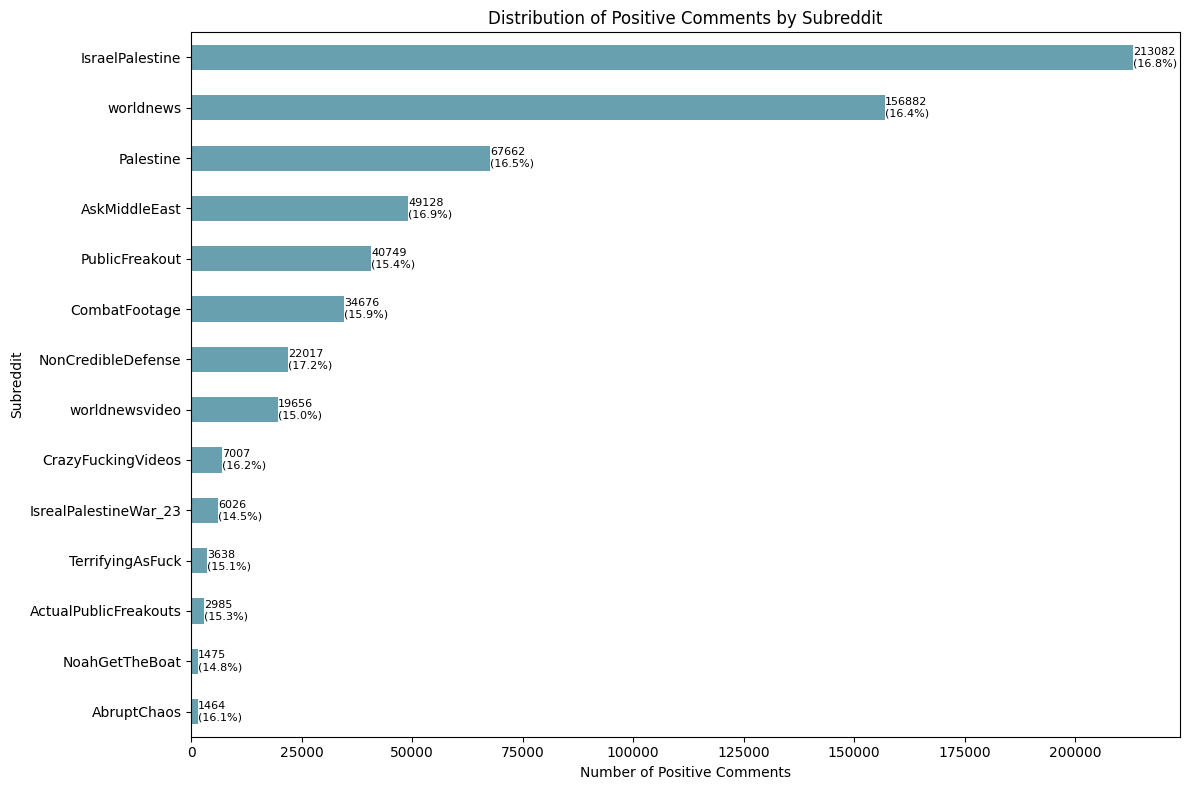

In [20]:
# Distribution of Positive Comments by Subreddit
# Create a bar chart for positive comments
plt.figure(figsize=(12, 8))
positive_counts = subreddit_sentiment_counts['positive'].sort_values(ascending=True)
positive_counts.plot(kind='barh', color=cm.viridis(0.4), alpha=0.7)

# Set the title and labels
plt.title('Distribution of Positive Comments by Subreddit')
plt.xlabel('Number of Positive Comments')
plt.ylabel('Subreddit')
plt.tight_layout()

# Calculate the total comments per subreddit
subreddit_sentiment_counts['total'] = subreddit_sentiment_counts.sum(axis=1)

# Add numbers and percentages on the right side of each bar
for i, value in enumerate(positive_counts):
    total_comments = subreddit_sentiment_counts.loc[positive_counts.index[i], 'total']
    percentage = (value / total_comments) * 100
    plt.text(value + 0.5, i, f'{value}\n({percentage:.1f}%)', ha='left', va='center', fontsize=8)

plt.show()

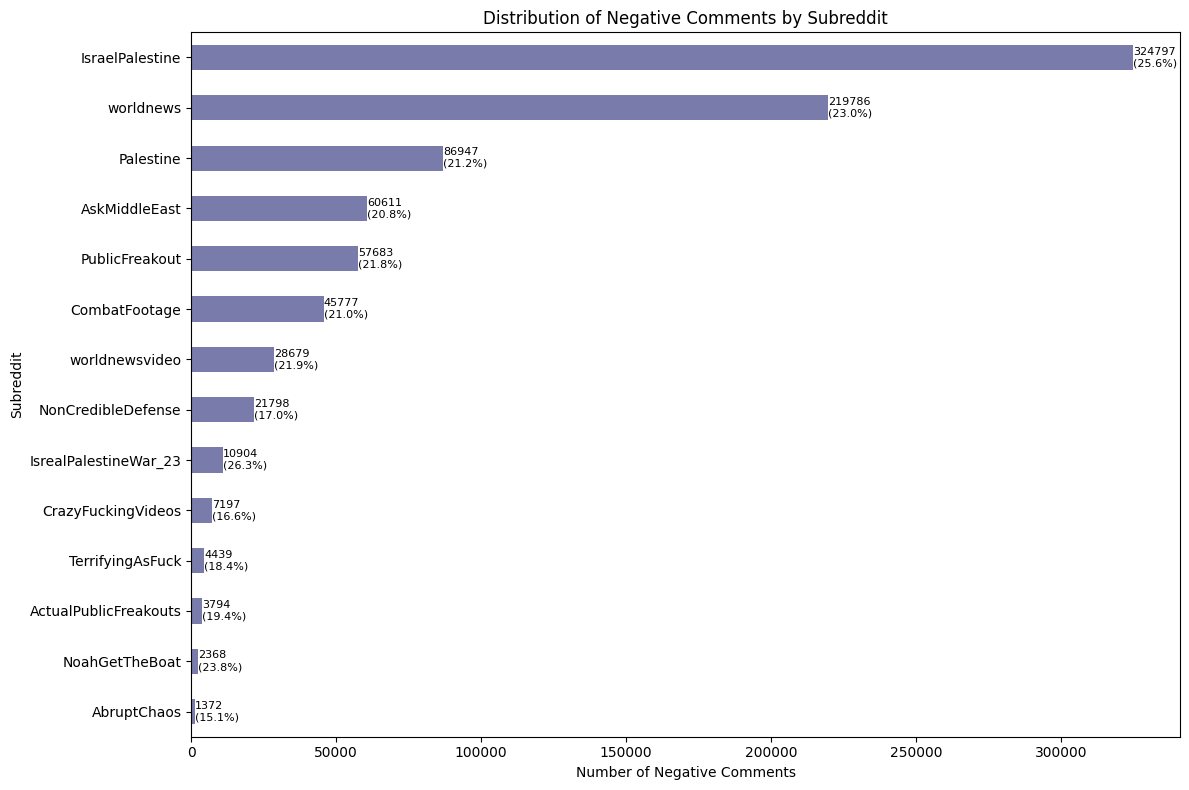

In [21]:
# Distribution of Negative Comments by Subreddit
# Negative comments bar chart
plt.figure(figsize=(12, 8))
negative_counts = subreddit_sentiment_counts['negative'].sort_values(ascending=True)
negative_counts.plot(kind='barh', color=cm.viridis(0.2), alpha=0.7) 

plt.title('Distribution of Negative Comments by Subreddit')
plt.xlabel('Number of Negative Comments')
plt.ylabel('Subreddit')
plt.tight_layout()

# Add numbers and percentages on the right side of each bar
for i, value in enumerate(negative_counts):
    total_comments = subreddit_sentiment_counts.loc[negative_counts.index[i], 'total']
    percentage = (value / total_comments) * 100
    plt.text(value + 0.5, i, f'{value}\n({percentage:.1f}%)', ha='left', va='center', fontsize=8)

plt.show()

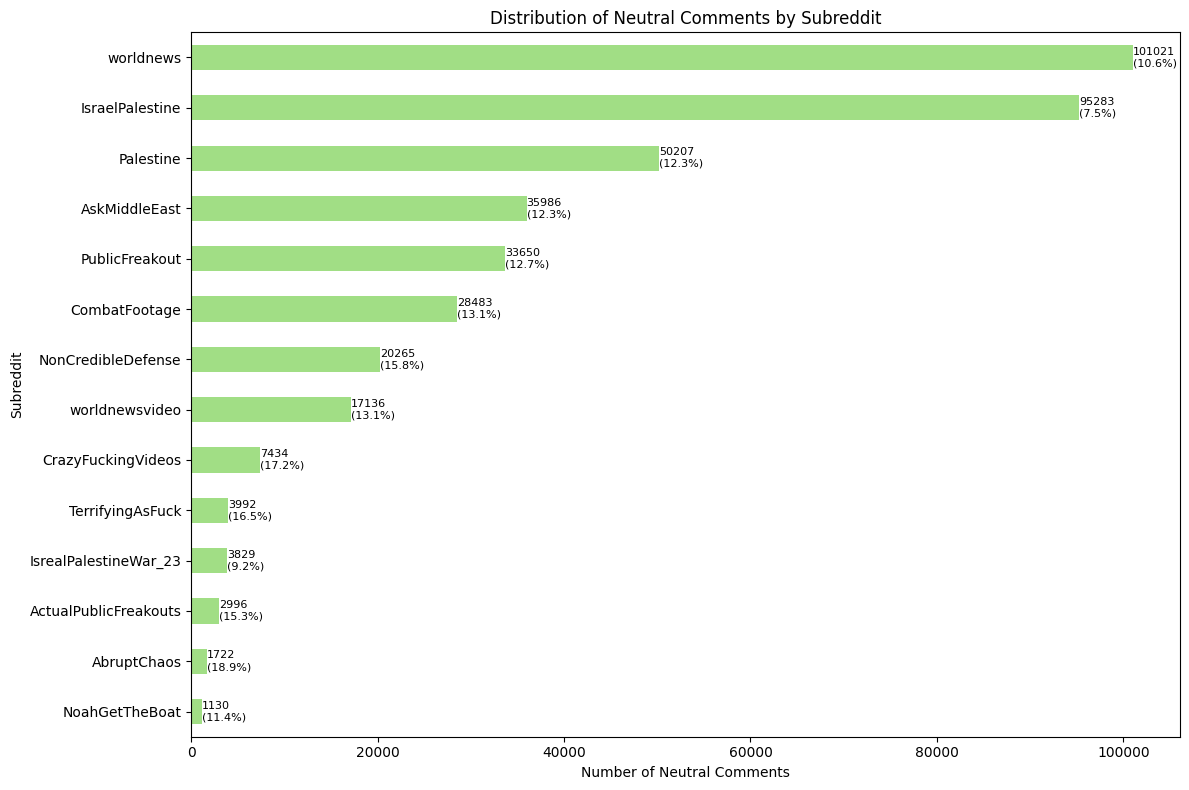

In [22]:
# Neutral comments bar chart
plt.figure(figsize=(12, 8))
neutral_counts = subreddit_sentiment_counts['neutral'].sort_values(ascending=True)
neutral_counts.plot(kind='barh', color=cm.viridis(0.8), alpha=0.7) 

plt.title('Distribution of Neutral Comments by Subreddit')
plt.xlabel('Number of Neutral Comments')
plt.ylabel('Subreddit')
plt.tight_layout()

# Add numbers and percentages on the right side of each bar
for i, value in enumerate(neutral_counts):
    total_comments = subreddit_sentiment_counts.loc[neutral_counts.index[i], 'total']
    percentage = (value / total_comments) * 100
    plt.text(value + 0.5, i, f'{value}\n({percentage:.1f}%)', ha='left', va='center', fontsize=8)

plt.show()

# 3. Analyze the comment scores to uncover trends and popular opinions

**Descriptive Statistics**   
calculating basic descriptive statistics of the sentiment scores to understand the overall trends.

In [23]:
# Descriptive statistics
descriptive_stats = verified_users_data['compound_score'].describe()
descriptive_stats

count    1.905733e+06
mean    -1.109671e-01
std      5.355358e-01
min     -9.999000e-01
25%     -5.837000e-01
50%      0.000000e+00
75%      3.182000e-01
max      9.997000e-01
Name: compound_score, dtype: float64

**Create histograms or density plots to visualize the distribution of sentiment scores**

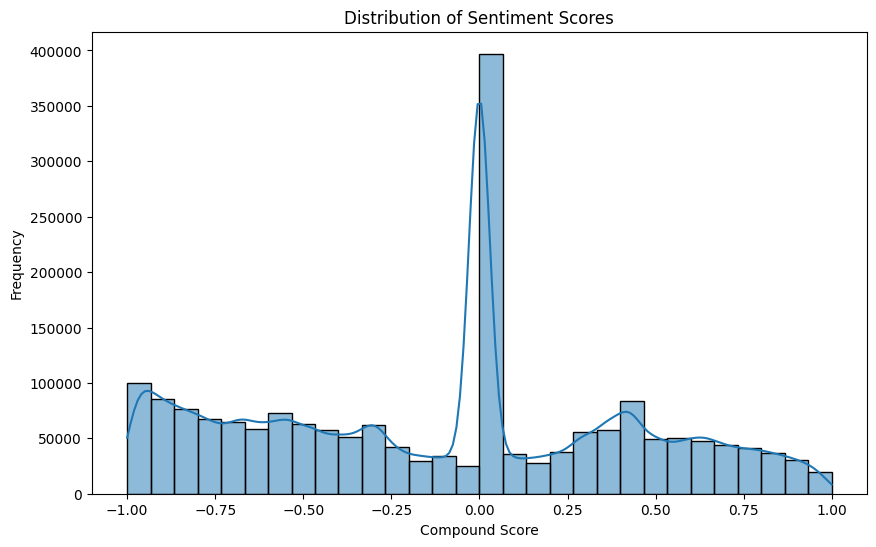

In [24]:
# Histogram of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(verified_users_data['compound_score'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()


**The output means:**

1. **Count**:  
   - **1,905,733**: This indicates that there are nearly 1.9 million entries (comments) in the dataset for which the compound scores were calculated.

2. **Mean**:  
   - **-0.110967**: The average compound score is approximately -0.11. This suggests that, on average, the comments in dataset tend to be slightly negative, as the compound score ranges from -1 (very negative) to +1 (very positive).

3. **Standard Deviation (std)**:  
   - **0.535535**: This measures the amount of variation or dispersion in the compound scores. A standard deviation of about 0.54 indicates a moderate spread of scores around the mean.

4. **Minimum (min)**:  
   - **-0.999**: This is the lowest compound score in the dataset, indicating that at least one comment is very negative.

5. **25th Percentile (25%)**:  
   - **-0.5837**: This value indicates that 25% of the comments have a compound score below -0.5837. It reflects the lower end of the score distribution.

6. **Median (50%)**:  
   - **0.0**: The median score is 0, meaning that half of the comments are negative or neutral (less than 0) and half are positive or neutral (greater than 0). This suggests a balance of sentiments, but the presence of negative scores is notable.

7. **75th Percentile (75%)**:  
   - **0.3182**: This indicates that 75% of the comments have a compound score below 0.3182, suggesting that a significant portion of comments is slightly positive or neutral.

8. **Maximum (max)**:  
   - **0.9997**: This is the highest compound score in the dataset, indicating that at least one comment is very positive.

**Summary**
**Overall, the statistics show that the comments in dataset are generally slightly negative on average to the war, with a good spread of sentiments from very negative to very positive to the war. The median score being zero indicates a mixed sentiment, with significant numbers of both negative and positive comments to the war.**

**Trends Over Time**  
analyze how sentiment scores change over time.

C:\Users\Bassa\AppData\Local\Temp\ipykernel_16096\6481532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verified_users_data['created_time'] = pd.to_datetime(verified_users_data['created_time'])


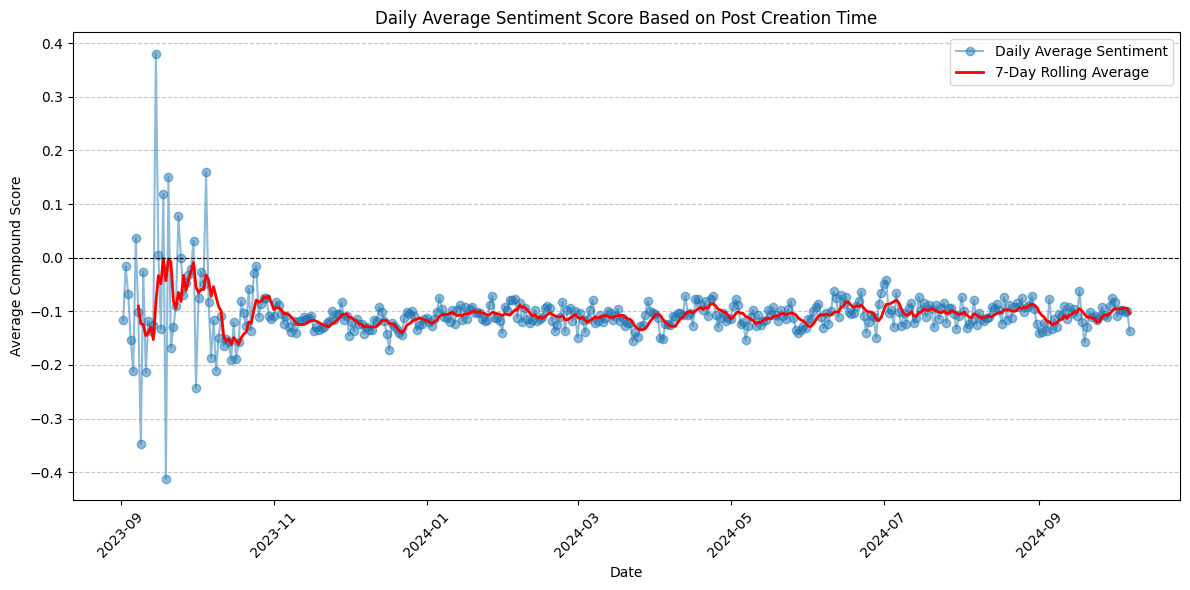

In [25]:
# Convert 'created_time' to datetime type if it's not already
verified_users_data['created_time'] = pd.to_datetime(verified_users_data['created_time'])

# Calculate the daily average sentiment based on 'created_time'
daily_sentiment = verified_users_data.groupby(verified_users_data['created_time'].dt.date)['compound_score'].mean()

# Calculate the 7-day rolling average
daily_sentiment_rolling = daily_sentiment.rolling(window=7).mean()

# Plot the daily sentiment and the rolling average
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment.index, daily_sentiment.values, marker='o', alpha=0.5, label='Daily Average Sentiment')
plt.plot(daily_sentiment_rolling.index, daily_sentiment_rolling.values, color='red', label='7-Day Rolling Average', linewidth=2)

plt.title('Daily Average Sentiment Score Based on Post Creation Time')
plt.xlabel('Date')
plt.ylabel('Average Compound Score')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

**The graph displays the daily average sentiment scores based on the comment creation time. Here’s how to interpret it:**

**X-Axis (Date)**: Represents the time period studied, from September 2023 to October 2024.

**Y-Axis (Average Compound Score):** Shows the average sentiment scores, where positive values indicate positive sentiments and negative values indicate negative sentiments to the war.

**Blue Dots:** Represent the daily average sentiment scores, showing significant fluctuations in compound Score to the war on certain days.

**Red Line (7-Day Rolling Average):** Provides a smoother view of the overall trends over time, helping to reduce the noise from daily changes. It indicates that the general trend has been toward negative sentiments to the war over most of the period.

**Overall Trend:** The graph suggests a general trend toward negative sentiments to the war, as most of the average sentiment scores remain below zero throughout the period.

**Fluctuations or Outliers:**
**Peak Observed in Oct 2023: This peak may indicate heightened emotions and reactions surrounding the onset of the war on October 7. The increase in sentiment scores during this period could reflect public responses to the unfolding situation and its impact on people's feelings and opinions.**

**Popular Opinions Analysis**

Analyze the most frequently used words in positive and negative comments to uncover popular opinions.


Text(0.5, 1.0, 'Word Cloud of Positive Comments')

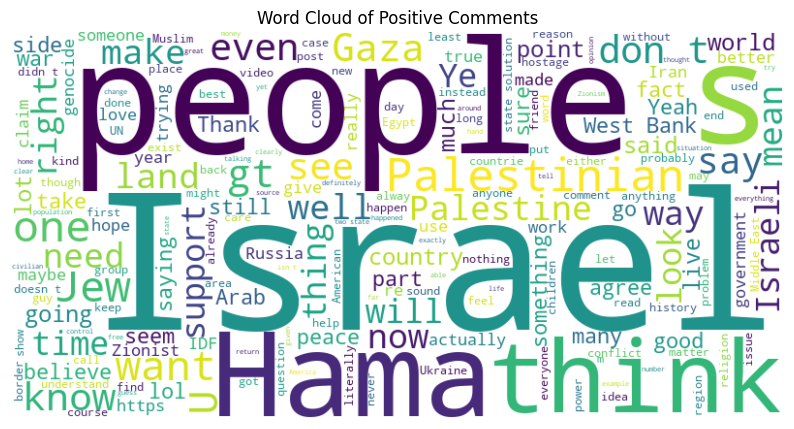

In [26]:
# positive comments word cloud
positive_comments = verified_users_data[verified_users_data['sentiment'] == 'positive']['self_text']  # Change 'comment' if necessary
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_comments))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Comments')

The word cloud offers a visual representation of the most frequently used words in positive comments. Here are some observations based on the content of the word cloud:

### Key Observations:

**1. Prominent Terms**:
   - The words **"Israel"**, **"Hamas"**, **"people"**, **"Palestinian"**, and **"think"** stand out as the largest, indicating they are the most commonly referenced concepts in positive comments.
   - The frequent mention of **"people"** and **"think"** suggests a focus on human aspects and opinions regarding the topic, possibly emphasizing perspectives on the conflict or situation.

**2. Contextual Themes**:
   - The presence of **"Gaza"**, **"land"**, and **"state"** indicates discussions around territorial and statehood issues, which are often central to the Palestine-Israel discourse.
   - The use of **"support"** and **"believe"** reflects a sentiment of advocacy or positive affirmation towards a cause or perspective related to the situation.

**3. Diversity of Perspectives**:
   - Words like **"Arab"**, **"Zionist"**, and **"Iran"** suggest that the comments may address broader geopolitical themes and various narratives within the discourse surrounding the Palestine-Israel conflict.
   - The inclusion of terms like **"understand"** and **"know"** implies that the comments may encourage empathy and trying understanding.

### General Impression:
Overall, the word cloud conveys a landscape of positive sentiments regarding the Palestine-Israel situation, focusing on human connection, beliefs, and advocacy for understanding. The comments likely reflect a desire for peace and resolution while highlighting the complexities of the political landscape. The prominence of certain terms points towards significant themes in current discussions about the region.

Text(0.5, 1.0, 'Word Cloud of Negative Comments')

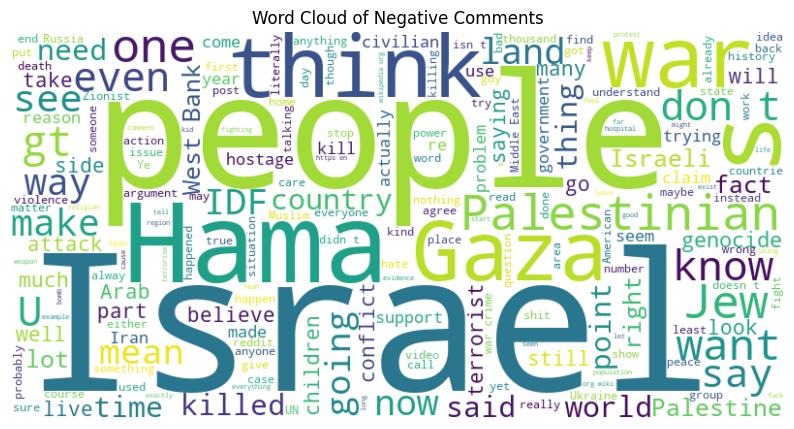

In [27]:
# Negative comments word cloud
negative_comments = verified_users_data[verified_users_data['sentiment'] == 'negative']['self_text']
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_comments))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Comments')


The word cloud visually represents the most frequent words in **negative comments** about the Palestine-Israel conflict. Here are some observations based on the prominent terms in the image:

### Key Observations:

**1. Prominent Terms**:
   - Words like **"Israel"**, **"Hamas"**, **"people"**, **"war"**, and **"Gaza"** are the largest, indicating that they are central topics of discussion in the negative comments to the war.
   - The frequent appearance of **"killed"**, **"war"**, **"terrorism"**, and **"genocide"** suggests that these comments are heavily focused on violence, conflict, and the devastating impacts of the ongoing situation.

**2. Conflict and Blame**:
   - Terms like **"Hamas"**, **"IDF"**, **"attack"**, **"killed"**, and **"terrorism"** point to discussions surrounding blame and responsibility for the violence, with negative sentiments likely directed at various parties involved in the conflict.
   - Words such as **"hate"**, **"claim"**, and **"wrong"** further suggest that the negative comments are marked by frustration, disagreement, or condemnation.

**3. Geopolitical and Social Aspects**:
   - Words like **"land"**, **"West Bank"**, **"Palestinian"**, **"Zionist"**, and **"Muslim"** show that the discussions include issues of territory, identity, and geopolitical alignments, reflecting longstanding grievances and disputes.
   - Mentions of **"Russia"**, **"Ukraine"**, and **"Iran"** might indicate a broader discussion tying the Palestine-Israel conflict to other international conflicts and power struggles.

**4. Human and Ethical Concerns**:
   - The word **"children"** stands out, suggesting a focus on the humanitarian impact of the conflict, with particular concern for innocent lives being affected.
   - Words like **"think"**, **"know"**, and **"mean"** imply introspective comments, possibly questioning motives or providing critiques on how people understand the conflict.

### General Impression:
The word cloud reflects a significant focus on the violence, blame, and geopolitical issues at the heart of the Palestine-Israel conflict. Negative sentiments appear to be driven by strong emotions concerning war, terrorism, and perceived injustices on both sides. There also seems to be a mixture of factual discussions and emotional responses, reflecting both political and human dimensions of the ongoing conflict.

# 4. Determine the most commonly used keywords and phrases in the comments

**Count Most Common Keywords**

In [28]:
# Prepare the Appropriate Column
comments = 'self_text'
verified_users_data[comments] = verified_users_data[comments].fillna('').astype(str)

# Combine all comments into a single text
text = ' '.join(verified_users_data[comments])

# Convert text to lowercase
text = text.lower()

# Remove punctuation
text = re.sub(r'[^\w\s]', '', text)

# Tokenize the text into words
words = text.split()

# Remove stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Count individual keywords
word_counts = Counter(filtered_words)

# Display the most common keywords
most_common_keywords = word_counts.most_common(10)

most_common_keywords


C:\Users\Bassa\AppData\Local\Temp\ipykernel_16096\474621416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verified_users_data[comments] = verified_users_data[comments].fillna('').astype(str)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bassa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('israel', 583374),
 ('people', 398557),
 ('hamas', 349194),
 ('like', 280344),
 ('would', 267208),
 ('dont', 264737),
 ('palestinians', 203559),
 ('war', 195949),
 ('one', 195364),
 ('think', 184877)]

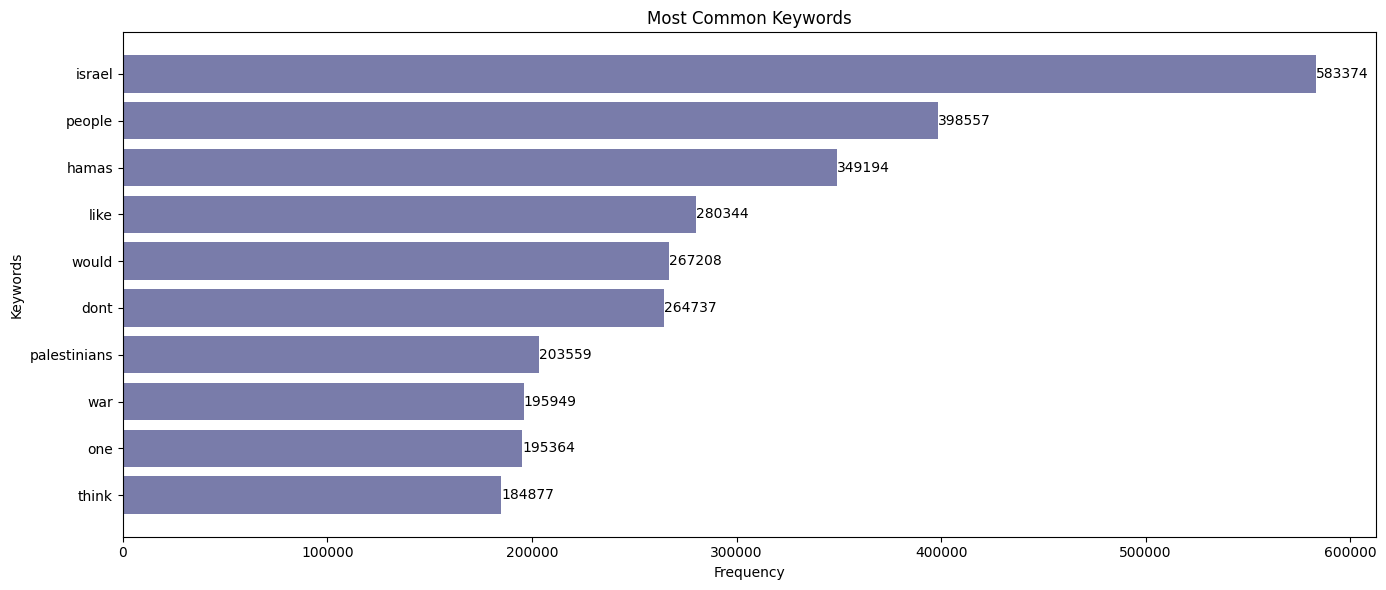

In [29]:
# Visualize the most common keywords
keywords, counts = zip(*most_common_keywords)
data = pd.DataFrame({'Keywords': keywords, 'Frequency': counts})
data.sort_values(by='Frequency', ascending=True, inplace=True)  # Sort to reverse the bar order
plt.figure(figsize=(14, 6))
bars = plt.barh(data['Keywords'], data['Frequency'], color=cm.viridis(0.2), alpha=0.7)
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,  # Positioning the text
             f'{int(bar.get_width())}',  # Display the count as an integer
             va='center')  # Center-align the text vertically
plt.title('Most Common Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.tight_layout()

**Count recurring word pairs (bi-grams)**

In [30]:
n = 2 
bi_grams = ngrams(filtered_words, n)
bi_gram_counts = Counter(bi_grams)

# Display the most common bi-grams
most_common_bi_grams = bi_gram_counts.most_common(10)

most_common_bi_grams

[(('west', 'bank'), 49194),
 (('dont', 'think'), 28353),
 (('dont', 'know'), 24955),
 (('middle', 'east'), 23593),
 (('im', 'sure'), 17647),
 (('dont', 'want'), 17607),
 (('jewish', 'people'), 15271),
 (('october', '7th'), 15121),
 (('war', 'crimes'), 13920),
 (('years', 'ago'), 13328)]

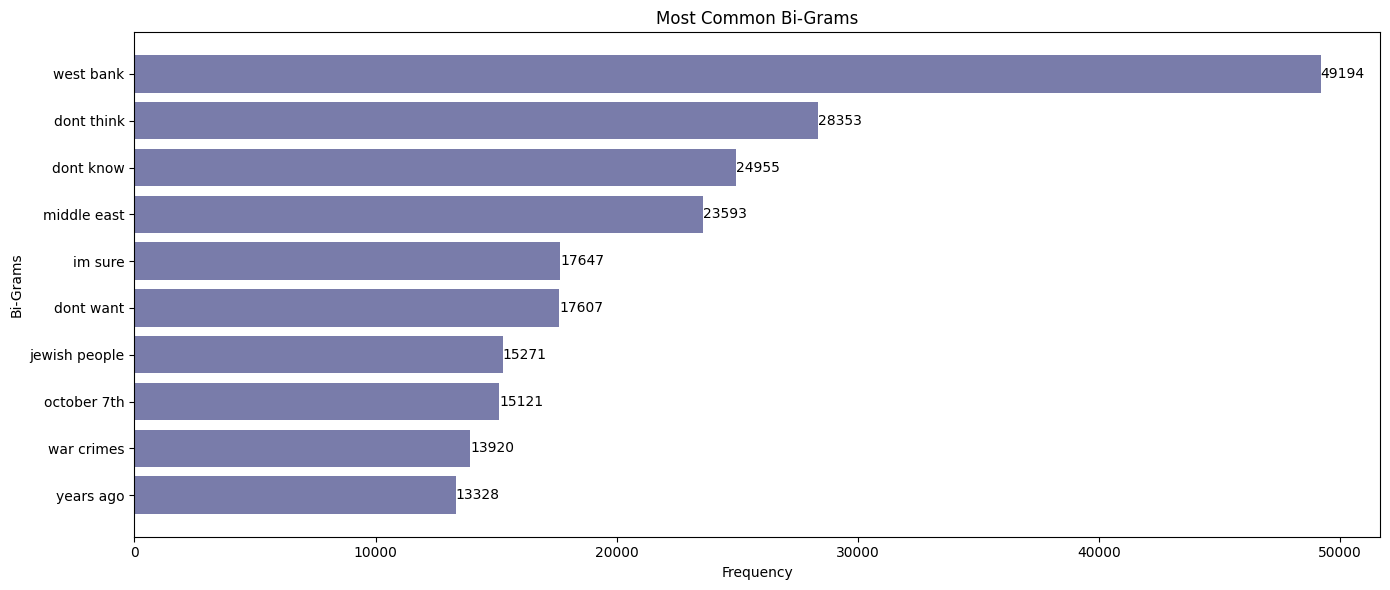

In [31]:
# Visualize the most common bi-grams
bi_grams_list = [' '.join(bi) for bi, _ in most_common_bi_grams]
bi_gram_counts = [count for _, count in most_common_bi_grams]

bi_gram_data = pd.DataFrame({'Bi-Grams': bi_grams_list, 'Frequency': bi_gram_counts})
bi_gram_data.sort_values(by='Frequency', ascending=True, inplace=True)
plt.figure(figsize=(14, 6))
bars = plt.barh(bi_gram_data['Bi-Grams'], bi_gram_data['Frequency'], color=cm.viridis(0.2), alpha=0.7)
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,  # Positioning the text
             f'{int(bar.get_width())}',  # Display the count as an integer
             va='center')  # Center-align the text vertically
plt.title('Most Common Bi-Grams')
plt.xlabel('Frequency')
plt.ylabel('Bi-Grams')
plt.tight_layout()
plt.show()



# 5. Identify the most common emotions found in the comments

**To analyze the sentiment of comments I will use the VADER lexicon, which is specifically designed for sentiment analysis in social media texts. That involves extracting the compound scores from the sentiment analysis, which quantifies the sentiment of each comment. If this compound score exceeds 0.05, we categorize the comment as expressing happiness, incrementing the corresponding count in our emotions dictionary. Conversely, if the compound score is below -0.05, we classify the comment as expressing sadness and increase the sadness count. Additionally, we check for specific emotional keywords in the text. If the word "angry" appears in a comment, we increase the count for anger. Similarly, we look for the presence of the words "surprise" and "fear," updating their respective counts whenever they are mentioned.**

In [32]:
# Download VADER lexicon if not already done
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

all_comments = verified_users_data['self_text'].tolist()

# Initialize a dictionary to count emotions
emotions = {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}

# Analyze emotions in each comment
for comment in all_comments:
    score = sia.polarity_scores(comment)
    if score['compound'] > 0.05:
        emotions['Happy'] += 1
    elif score['compound'] < -0.05:
        emotions['Sad'] += 1
    if 'angry' in comment.lower():
        emotions['Angry'] += 1
    if 'surprise' in comment.lower():
        emotions['Surprise'] += 1
    if 'fear' in comment.lower():
        emotions['Fear'] += 1

# Convert the emotions dictionary to a DataFrame for easier visualization
emotion_df = pd.DataFrame(emotions.items(), columns=['Emotion', 'Count'])

emotion_df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Bassa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Emotion,Count
0,Happy,626397
1,Angry,4789
2,Surprise,12345
3,Sad,876122
4,Fear,10224


C:\Users\Bassa\AppData\Local\Temp\ipykernel_16096\693483471.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotion', y='Count', data=emotion_df_sorted, palette='coolwarm')


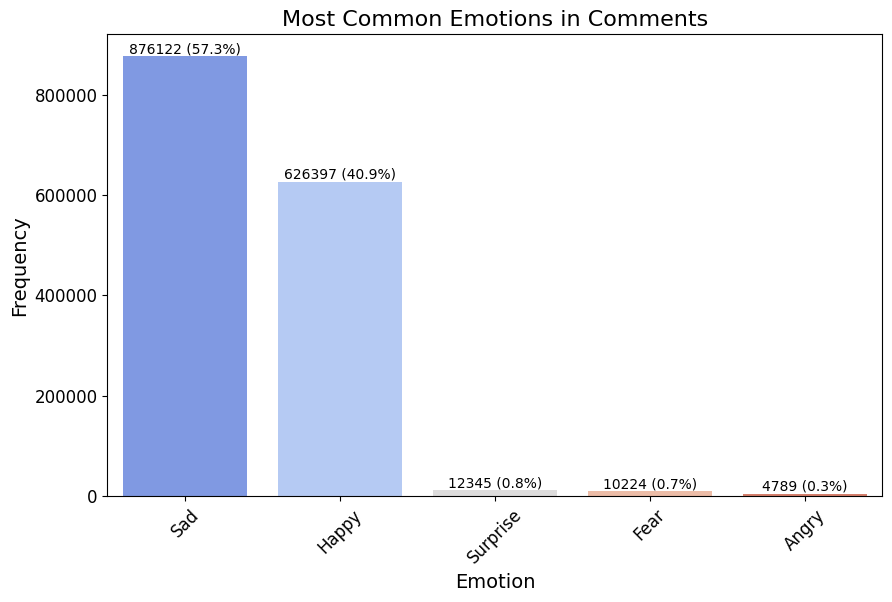

In [33]:
# Visualize the most common emotions as a column chart
plt.figure(figsize=(10, 6))

# Sort the data to make the plot more readable
emotion_df_sorted = emotion_df.sort_values(by='Count', ascending=False)

# Create the column chart
sns.barplot(x='Emotion', y='Count', data=emotion_df_sorted, palette='coolwarm')

# Add the count and percentage on top of each bar
for index, value in enumerate(emotion_df_sorted['Count']):
    percentage = (value / emotion_df_sorted['Count'].sum()) * 100
    plt.text(index, value, f'{value} ({percentage:.1f}%)', va='bottom', ha='center', fontsize=10, color='black')

# Add titles and labels
plt.title('Most Common Emotions in Comments', fontsize=16)
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 6. Analyze the most popular hours and months

**Hours Distribution**

In [34]:
# Convert timestamp to datetime
verified_users_data['created_time'] = pd.to_datetime(verified_users_data['created_time'])

# Extract hour from the timestamp
verified_users_data['hour'] = verified_users_data['created_time'].dt.hour

# Group by hour and count the number of comments
hourly_counts = verified_users_data.groupby('hour')['self_text'].count()

hourly_counts


C:\Users\Bassa\AppData\Local\Temp\ipykernel_16096\4279964057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verified_users_data['created_time'] = pd.to_datetime(verified_users_data['created_time'])
C:\Users\Bassa\AppData\Local\Temp\ipykernel_16096\4279964057.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verified_users_data['hour'] = verified_users_data['created_time'].dt.hour


hour
0      76263
1      70129
2      65318
3      62068
4      58209
5      54568
6      52563
7      51834
8      52432
9      52913
10     57591
11     65311
12     77005
13     90180
14     98395
15    104696
16    107848
17    108673
18    108046
19    106479
20    104979
21    101194
22     94514
23     84525
Name: self_text, dtype: int64

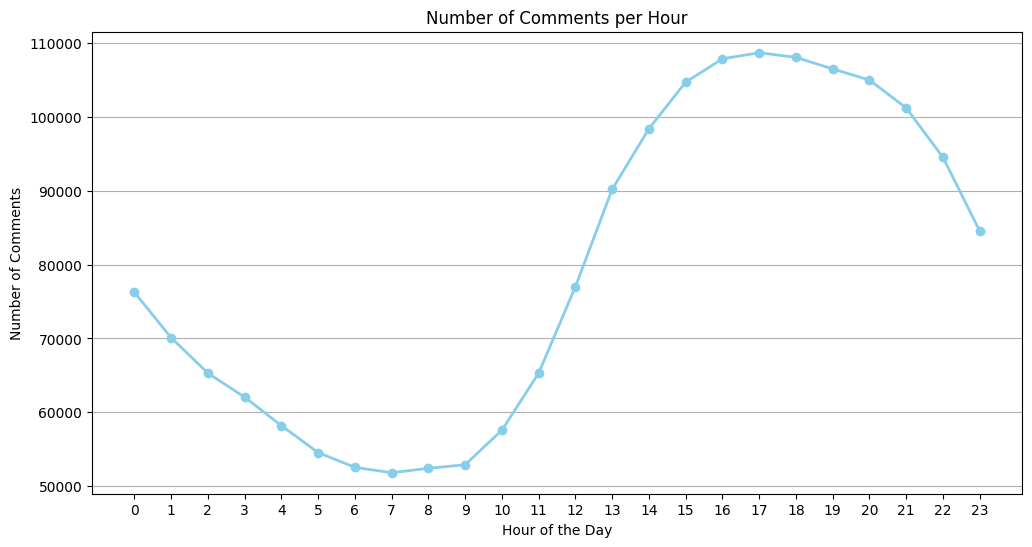

In [35]:
# Plot the number of comments per hour
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='line', marker='o', color='skyblue', linewidth=2)  # Add markers for better visibility
plt.title('Number of Comments per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.xticks(range(24))
plt.show()

**Distribution by Month**

In [36]:
# Convert timestamp to datetime
verified_users_data['created_time'] = pd.to_datetime(verified_users_data['created_time'])

# Extract months and years from the timestamp
verified_users_data['year_month'] = verified_users_data['created_time'].dt.to_period('M')

# Group by year and month and count the number of comments
monthly_counts = verified_users_data.groupby('year_month')['self_text'].count()

monthly_counts


C:\Users\Bassa\AppData\Local\Temp\ipykernel_16096\1366251079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verified_users_data['created_time'] = pd.to_datetime(verified_users_data['created_time'])
C:\Users\Bassa\AppData\Local\Temp\ipykernel_16096\1366251079.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verified_users_data['year_month'] = verified_users_data['created_time'].dt.to_period('M')


year_month
2023-09      1814
2023-10     23490
2023-11    271401
2023-12    256781
2024-01    185049
2024-02    149717
2024-03    154664
2024-04    169958
2024-05    176574
2024-06    128657
2024-07    100011
2024-08    118665
2024-09    126816
2024-10     42136
Freq: M, Name: self_text, dtype: int64

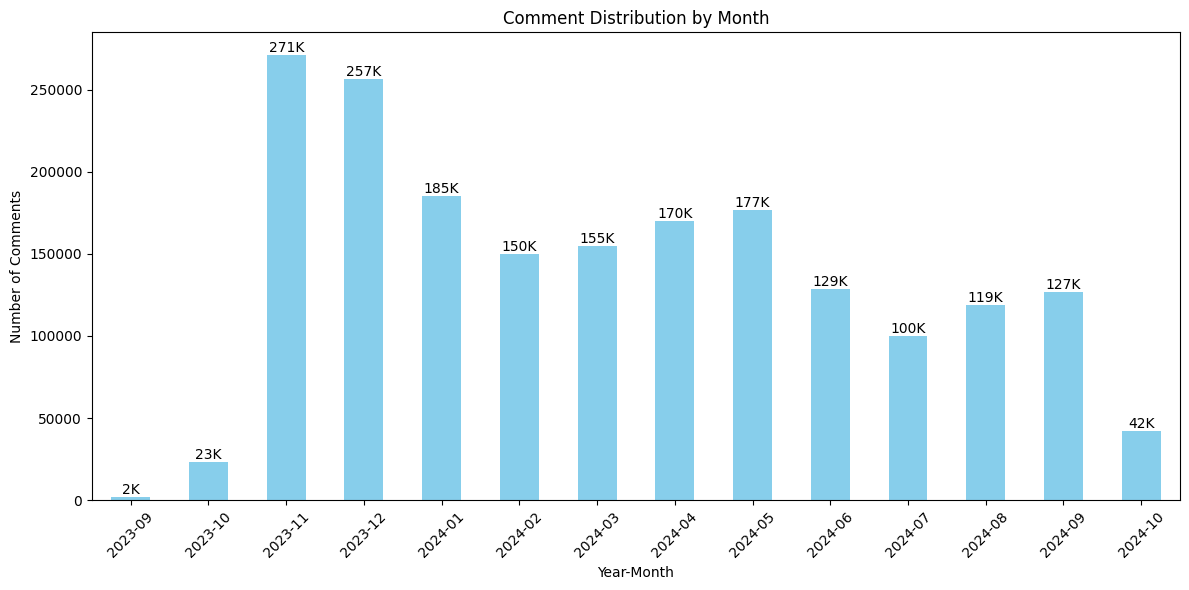

In [37]:
# Plot the bar chart for comment distribution by month
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Comment Distribution by Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Comments')

# Format the x-axis to show all months
plt.xticks(rotation=45)
plt.xticks(ticks=range(len(monthly_counts)), labels=monthly_counts.index.astype(str), fontsize=10)

# Add numbers on the bars, approximated in thousands
for index, value in enumerate(monthly_counts):
    plt.text(index, value, f'{value/1000:.0f}K', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

**Monthly Distribution of Positive, Negative, and Neutral Comments**

In [40]:
# Define the function to assign sentiment based on the compound score
def assign_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create a 'sentiment' column
verified_users_data['sentiment'] = verified_users_data['compound_score'].apply(assign_sentiment)

verified_users_data['sentiment'] = verified_users_data['compound_score'].apply(assign_sentiment)
verified_users_data['year_month'] = verified_users_data['created_time'].dt.to_period('M')

# Group by year_month and sentiment, then count the occurrences
sentiment_counts = verified_users_data.groupby(['year_month', 'sentiment']).size().unstack(fill_value=0)

sentiment_counts


C:\Users\Bassa\AppData\Local\Temp\ipykernel_16096\1886256217.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verified_users_data['sentiment'] = verified_users_data['compound_score'].apply(assign_sentiment)
C:\Users\Bassa\AppData\Local\Temp\ipykernel_16096\1886256217.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verified_users_data['sentiment'] = verified_users_data['compound_score'].apply(assign_sentiment)
C:\Users\Bassa\AppData\Local\Temp\ipykernel_16096\1886256217.py:14: SettingWithCopyWarning

sentiment,negative,neutral,positive
year_month,,,
2023-09,732,499,583
2023-10,10411,5983,7096
2023-11,126462,55755,89184
2023-12,121376,51705,83700
2024-01,84439,39283,61327
2024-02,68428,31292,49997
2024-03,71857,32954,49853
2024-04,77447,37101,55410
2024-05,82013,36200,58361


**Positive and Negative comments by month Chart**

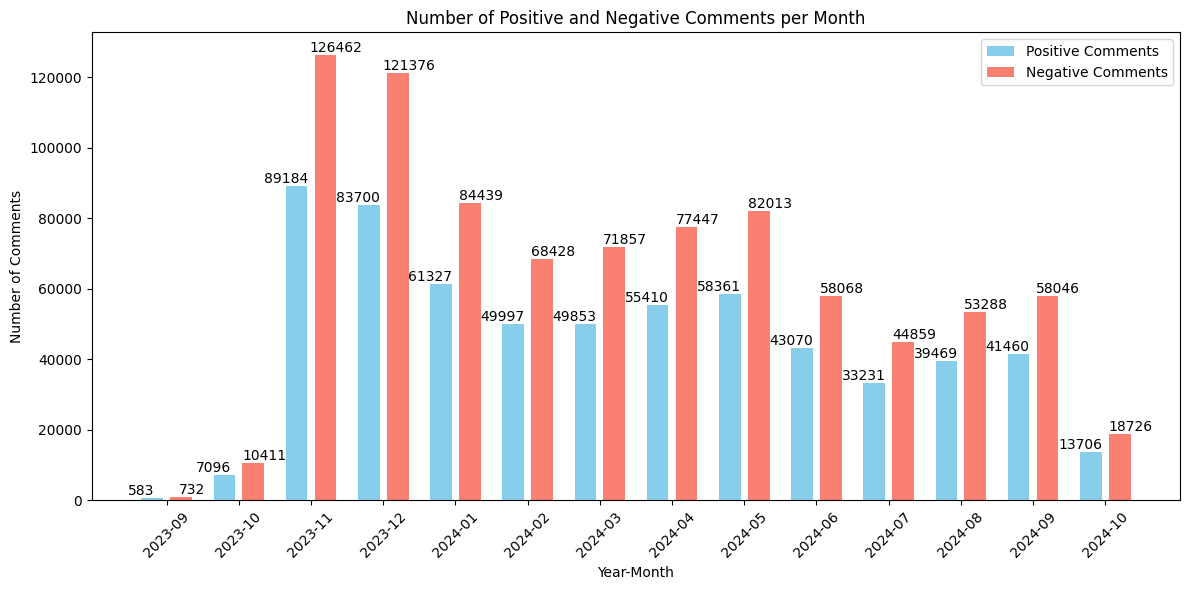

In [41]:
positive_comments_counts = sentiment_counts['positive']
negative_comments_counts = sentiment_counts['negative']

# Set up the figure and the bar width
plt.figure(figsize=(12, 6))
bar_width = 0.3  
x = np.arange(len(positive_comments_counts)) 

# Create bars for positive and negative comments with increased spacing
plt.bar(x - bar_width/3 - 0.10, positive_comments_counts, width=bar_width, label='Positive Comments', color='skyblue')
plt.bar(x + bar_width/3 + 0.10, negative_comments_counts, width=bar_width, label='Negative Comments', color='salmon')

# Add titles and labels
plt.title('Number of Positive and Negative Comments per Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Comments')
plt.xticks(ticks=x, labels=positive_comments_counts.index.astype(str), rotation=45)

# Add a legend
plt.legend()

# Add numbers on the bars, adjusted for better spacing
for index, value in enumerate(positive_comments_counts):
    plt.text(index - bar_width/1 - 0.05, value, str(value), ha='center', va='bottom', fontsize=10)

for index, value in enumerate(negative_comments_counts):
    plt.text(index + bar_width/1 + 0.05, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# 7. Analyzing Controversial Comments

In [47]:
Controversial_comment_counts = verified_users_data['controversiality'].value_counts().reset_index()
Controversial_comment_counts.columns = ['controversiality', 'Number of Comments']

# Calculate the percentages
total_comments = Controversial_comment_counts['Number of Comments'].sum()
Controversial_comment_counts['Percentage'] = (Controversial_comment_counts['Number of Comments'] / total_comments) * 100

Controversial_comment_counts

,controversiality,Number of Comments,Percentage
0,0,1781887,93.501398
1,1,123846,6.498602


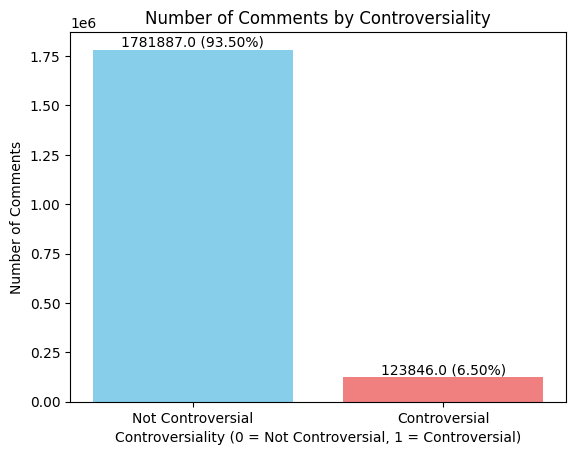

In [48]:
# Create a bar plot for the number of comments by controversiality
plt.bar(
    Controversial_comment_counts['controversiality'].astype(str), 
    Controversial_comment_counts['Number of Comments'], 
    color=['skyblue', 'lightcoral'])
plt.title('Number of Comments by Controversiality')
plt.xlabel('Controversiality (0 = Not Controversial, 1 = Controversial)')
plt.ylabel('Number of Comments')
plt.xticks([0, 1], ['Not Controversial', 'Controversial'], rotation=0)

# Annotate bars with the count and percentage
for index, row in Controversial_comment_counts.iterrows():
    plt.text(
        index, 
        row['Number of Comments'], 
        f"{row['Number of Comments']} ({row['Percentage']:.2f}%)", 
        ha='center', 
        va='bottom'
    )

# Display the plot
plt.show()


> **"This project was entirely developed by **Bassam El-Shoraa**"**.